***Math is the tool specially suited for dealing with abstract concepts of any kind and there is no limit to its power in this field***

## **Introduction to Linear Regression**

### Statistical Modelling

**Statistical Modelling** uses data along with statistics to provide a framework that understands the relationship between different data points.

The core idea behind statistical modelling is to construct mathematical models that capture these relationships, enabling us to draw meaningful conclusions from the data and make predictions about future or unobserved data points.

We will mainly be focused on **inferential** model building process, which means we are looking for a better understanding of how the variables of the model relate to each other. (The other main form of model building is **predictive**, which focuses more on making predictions about unseen data)


### Model vs Algorithm

By now you probably heard the phrase "training a model".

A model *trains* via its algorithm, and you can think of an algorithm as a series of steps that a model takes to train.

### Data

Before building a model you have to first set up your **dependent** and **independent** variables. **Independent variables** are the variables that will affect (or will lead to a change in the) **dependent variables**

* **Dependent variables**: data that can be controlled directly (other names: outcome variables, target variables, response variables)
* **Independent variables**: data that cannot be controlled directly (other names: predictor variables, input variables, explanatory variables, features)

Conventionally, the independent variable goes on the x-axis, or the horizontal axis.

This is an example where we look at someone's income depending on their age. Below, you see a scatter plot where age is the independent variable, and income is the dependent variable. In this setting, **we want to study if age has some effect on annual income**.

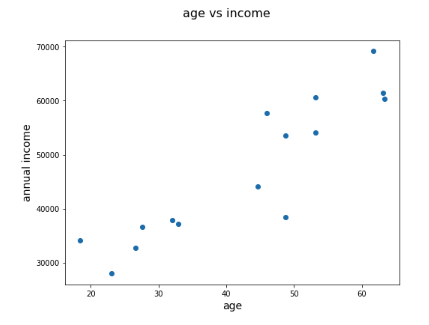


## A Linear Regression

Like we said before, a statistical model defines the **relationship** between a dependent and an independent variable.

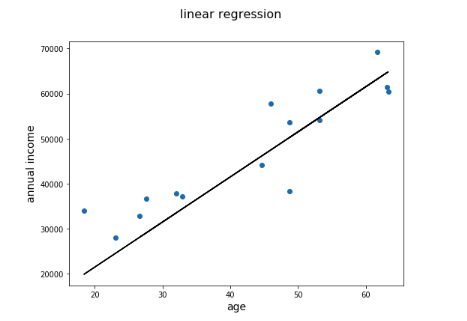

For the plot above, the relationship between age and income can be shown using a **straight line** connecting all the individual observations in the data. So this line here would be our **model** as shown in the image above.

We can define and fit such a straight line to our data using the following equation :

$$y = m  x + c$$

You will often come across Greek Letters talking about the same models. A common way of writing a linear equation using Greek letters is ($\beta$ is the Greek letter "beta") 

$$y = \beta_0 + \beta_1  x $$

y: dependent variable

x: independent variable

β: parameters/coefficients

$\beta_0$ has the same role as $c$ in the first expression and denotes the _intercept with the y-axis_.
$\beta_1$ has the same role as $m$ in the first expression and denotes the _slope of the line_. More on this below.

Looking at this line above, we can define it as **Income = 1500 + 1000 * Age**, based on slope ($m$ or $\beta_1$) and intercept ($c$ or $\beta_0$) values.

So this is our simple model for the relationship. Of course we can use more sophisticated model for a better fit, you may see this as you dig into more advanced modelling. This would be our **linear model** which can help us work out an income value

### Statistical Model Parameters

In the example above, where `Income` = 1500 + 1000 * `Age`, we have modeled `Income` as the dependent variable and `Age` as the independent variable.

The other pieces of the equation, 1500 and 1000, are the model ***parameters***. The step of "fitting" a model means finding the best value for these parameters. For linear regression in particular, these parameters are ***coefficients*** and we will use the terms "parameters" and "coefficient" fairly interchangeably.

Depending on the type of analysis you are performing, the parameters themselves may be the most interesting aspect of the model. For example, our model of `Income` seems to indicate a potential causal link between `Age` and higher income.

In other cases, the parameters are mainly a tool for making predictions about the dependent variable.

### Model Loss

A loss function evaluates how well your model represents the relationship between data variables.

If the model is unable to identify the underlying relationship between the independent and dependent variable(s), the loss function will output a very high number. Consider the age vs. income example above. You can see that the linear model is not exactly touching each data point because these points do not exist in a line. The individual distance of each point from the line is the **loss** that the model exhibits. 

<img src="new_loss.png" width="400">

These individual losses, which is essentially the **vertical distance between the individual data points and the line** are taken into account to calculate the overall model loss. 

If the relationship is well modeled, the loss will be low. As we change the parameters of our model to try and improve results, our loss function is our best friend, telling us if we are on the right track. 


### Line of Best-Fit

There is more than one method for choosing the right parameters for a Linear Regression. You might come across methods using matrix multiplication, covariances, or gradient descent. However, the metric that each method uses to determine the **best line** is the same -- **Least Squared Error**. That's where the term OLS (ordinary least squares) comes from.

### How Well-Fit is the Best-Fit?

A metric to determine **how well the line fits our data** is the **coefficient of determination** or $R^2$ (R-squared).

<img src="linreg_rsq.png" width="600">


The mathematical formula to calculate R-Squared for a linear regression line is in terms of **squared errors** for the fitted model and the baseline model. It's calculated as :

$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$

* $SS_{RES}$ (also called RSS) is the **Residual** sum of squared errors of our regression model also known as **$SSE$** (Sum of Squared Errors). $SS_{RES}$ is the squared difference between $y$ and $\hat y$. For the one highlighted observation in our graph above, the $SS_{RES}$ is denoted by the red arrow. This part of the error is not explained by our model.


* $SS_{TOT}$ (also called TSS) is the **Total** sum of squared error. $SS_{TOT}$ is the squared difference between $y$ and $\overline y$. For the one highlighted observation in our graph above, the $SS_{TOT}$ is denoted by the orange arrow.

An R-squared value of say 0.85 can be described conceptually as:

> ***85% of the variations in dependent variable $y$ are explained by the independent variable in our model.***

# Our First Regression!

We'll start with a Simple Linear Regression, which is a model that uses just `one` independent variable to predict your dependent variable.

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('heightWeight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


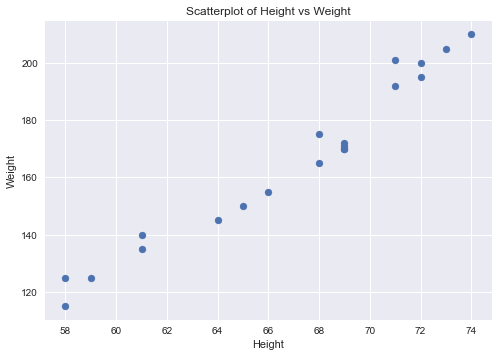

In [3]:
plt.scatter(df.height, df.weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatterplot of Height vs Weight")
plt.show()

In [4]:
# setting up OLS Linear Regression with Statsmodels

f = 'weight~height'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.35e-13
Time:                        08:13:34   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit:

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables.
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

The second table shows the coefficient report:

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

The third table shows information about the residuals, autocorrelation, and multicollinearity:

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: Provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).



# Assumptions for Linear Regression

Regression is a parametric technique, which means that it uses parameters learned from the data. Because of that, certain assumptions must be made. These assumptions define the complete scope of regression analysis and it is **mandatory** that the underlying data fulfills these assumptions. If violated, regression makes biased and unreliable predictions. Luckily, we have measures to check for these assumptions.

## 1. Linearity

> The linearity assumptions requires that there is a **linear relationship** between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

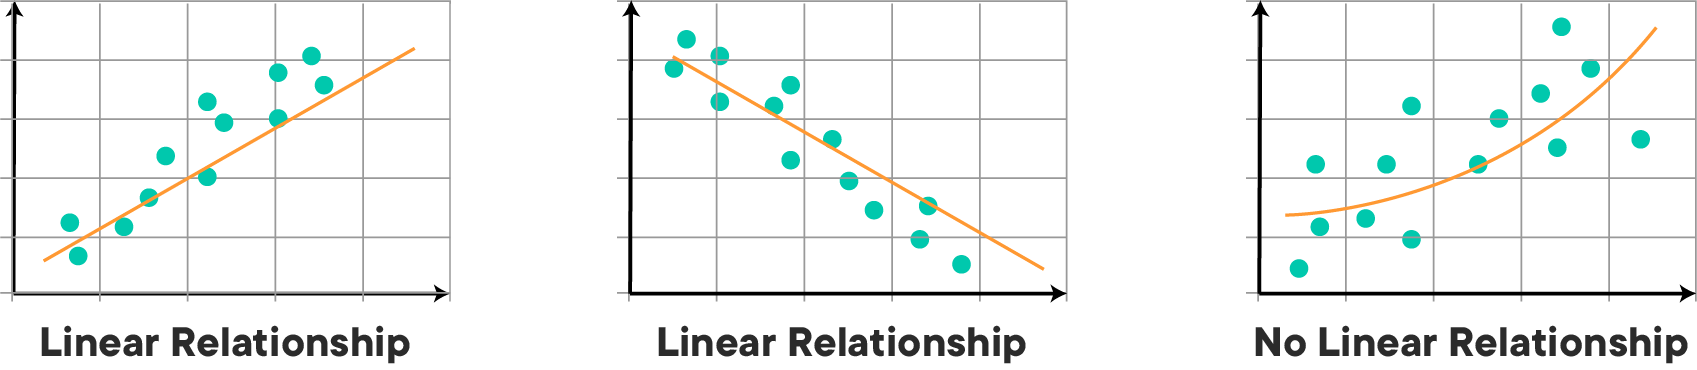



As shown above, If we try to fit a linear model to a non-linear data set, OLS will fail to capture the trend mathematically, resulting in an inaccurate relationship. This will also result in erroneous predictions on an unseen data set.  

>The linearity assumption can best be tested with scatter plots


**Note: As an extra measure, it is also important to check for outliers as the presence of outliers in the data can have a major impact on the model.**

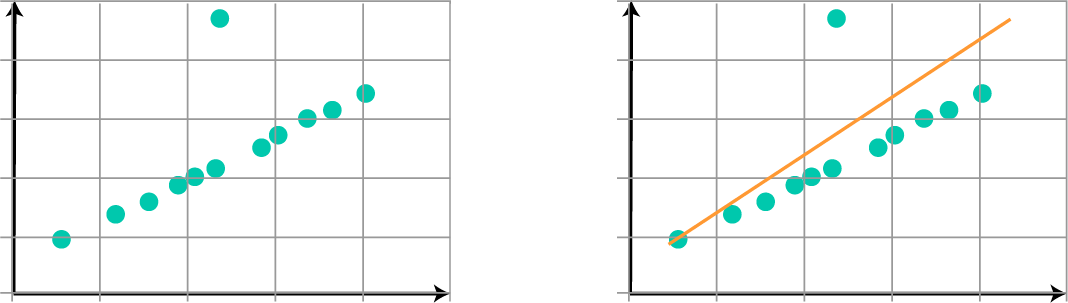

In the above example, we can see that an outlier prohibits the model to estimate the true relationship between variables by introducing bias.


## 2. Normality


> The normality assumption states that the **model residuals** should follow a normal distribution

Note that the normality assumption talks about the **model residuals** and _not_ about the distributions of the **variables**! In general, data scientists will often check the distributions of the variables as well. Keep in mind that the normality assumption is mandatory for the residuals, and it is useful to check normality of your variables to check for weirdness.

The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots.

The image below shows an example of using a histogram to visualize model residuals.

<img src="inhouse_histo.png" width="800">

## 3. Homoscedasticity

> _Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a dependent variable's variability is equal across values of the independent variable. **Homoscedasticity is the third assumption necessary when creating a linear regression model.**

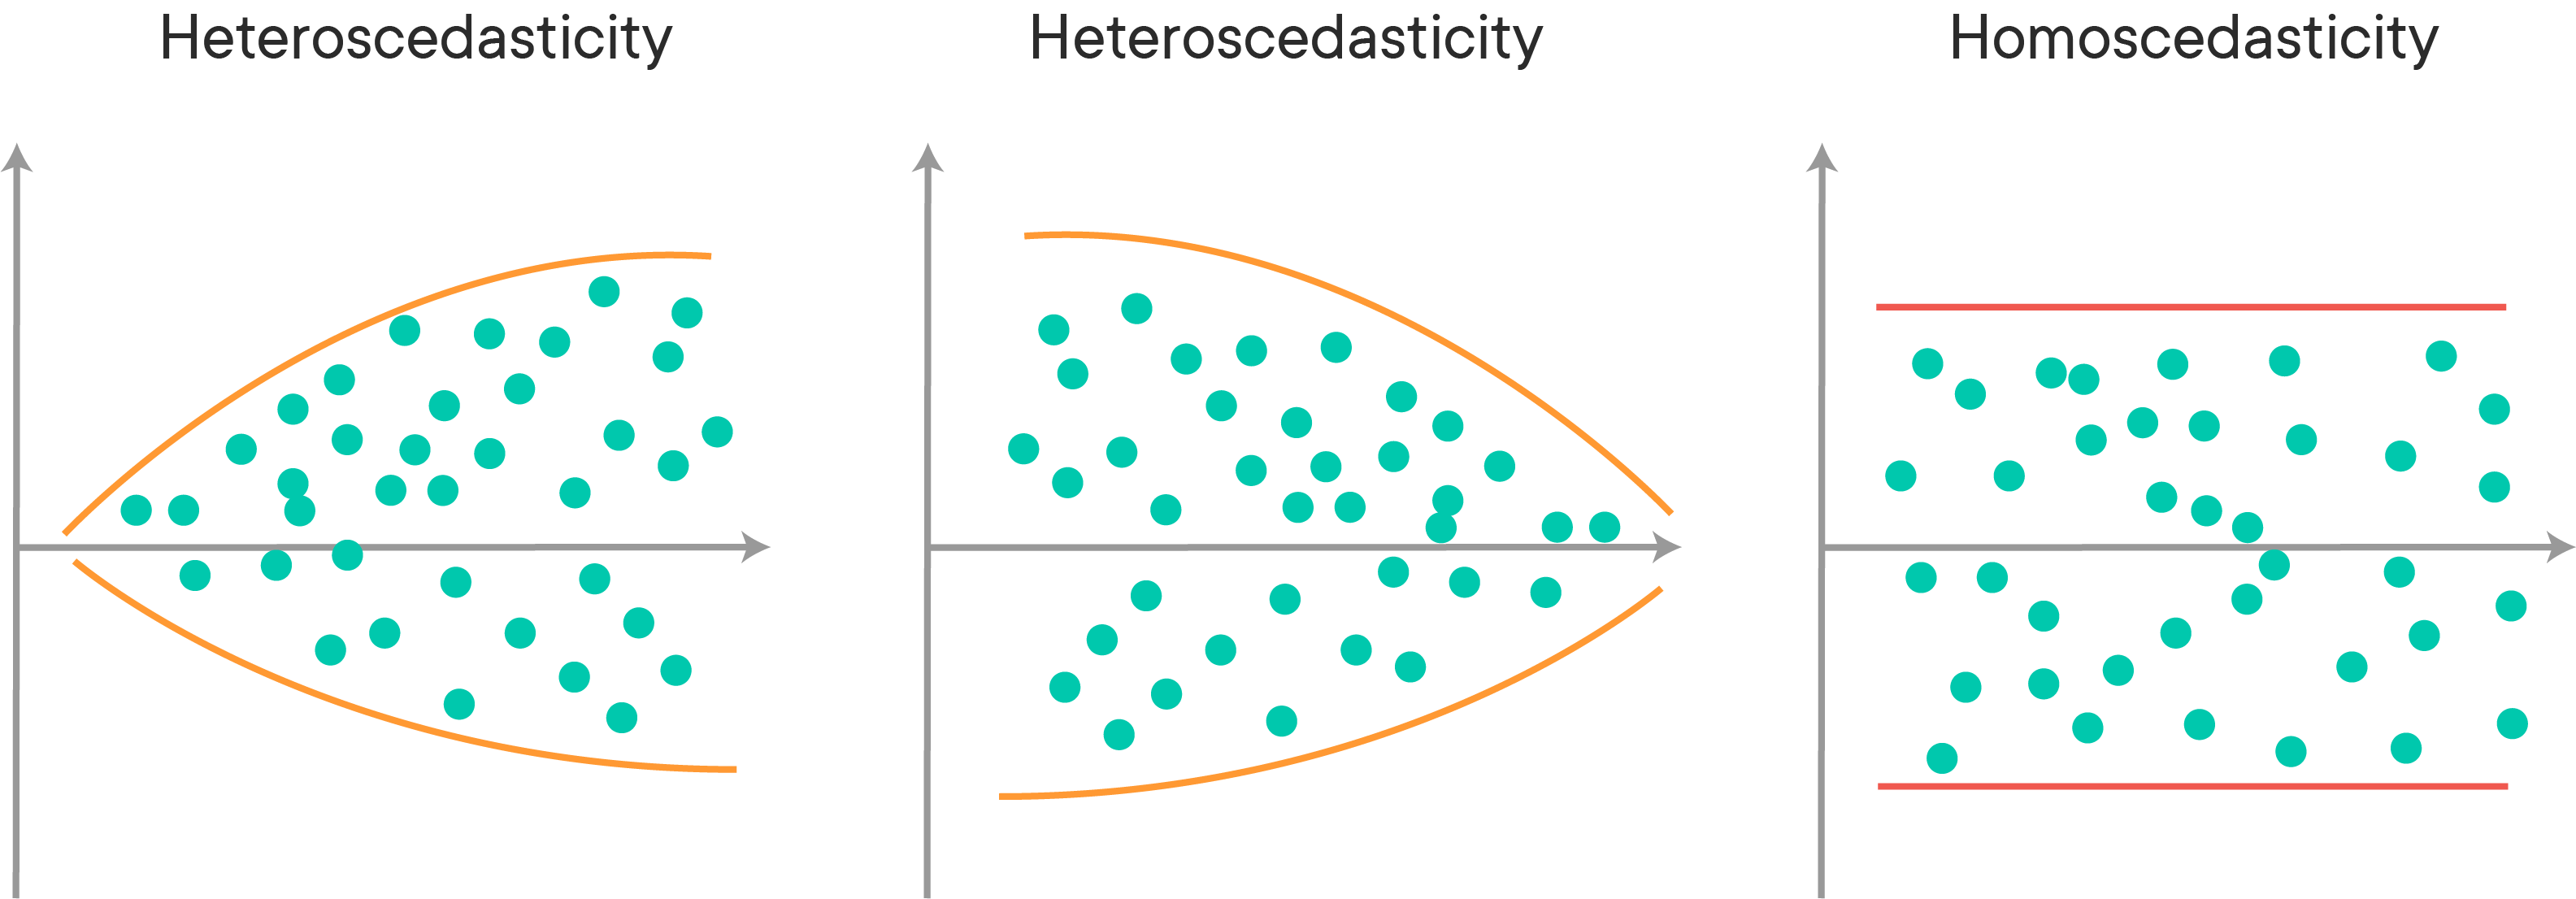

A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).  The scatter plots shown here are examples of data that are heteroscedastic (except the plot far right). You can also use significance tests like Breusch-Pagan / Cook-Weisberg test or White general test to detect this phenomenon.